<a href="https://colab.research.google.com/github/Risskr/Stock-App/blob/Simplified/StocksApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Up**


In [1]:
# #refesh python script
# get_ipython().kernel.do_shutdown(restart=True)

# #Check GPUs
# !nvidia-smi

#load cudf to use GPUs for analysis
#%load_ext cudf.pandas

# import pandas
import pandas as pd
import datetime
import pickle
import numpy as np
from tqdm.notebook import tqdm

#!pip install tqdm==4.66.1

# **Examples**

## Example how to locate in dataframes and in sereies

In [ ]:
# GOOGDailyClose_Series = GOOGDailyClose['close']

#Dataframe example
# x = GOOGDailyClose.loc[('GOOG', 2020, 1, 2), 'close']
# print(x)

#Series Example
# y = GOOGDailyClose_Series.loc[('GOOG', 2020, 1, 2)]
# print(y)

## Example graph

In [ ]:
# # from matplotlib import pyplot as plt
# # GOOGDailyClose['close'].plot(kind='line', figsize=(8, 4), title='close')
# # plt.gca().spines[['top', 'right']].set_visible(False)

# from matplotlib import pyplot as plt

# # Create the plot for GOOGDailyClose
# ax = GOOGDailyClose['close'].plot(kind='line', figsize=(8, 4), title='Closing Stock Prices')

# # Add the plot for MSFTDailyClose to the same axes
# MSFTDailyClose['close'].plot(kind='line', ax=ax)

# # Hide the top and right spines
# plt.gca().spines[['top', 'right']].set_visible(False)

# # Add a legend to distinguish the lines
# plt.legend(['GOOG', 'MSFT'])

## Example Call Function from another file
Eample Call Correlation_Coefficient function from another My Drive file

In [ ]:
# %run "/content/drive/My Drive/Colab Notebooks/Correlation_Coefficient.ipynb"

# Correlation_Coefficient(GOOGDailyClose, MSFTDaily Close)


# **Get Stock Data**

## Function: Download Stock Data to My Drive

In [ ]:
def DownloadStockData():
  #Download the stock data
  !if [ ! -f "usa_stocks_30m.parquet" ]; then curl https://storage.googleapis.com/rapidsai/colab-data/usa_stocks_30m.parquet -o usa_stocks_30m.parquet; else echo "usa_stocks_30m.parquet found"; fi

  #move the stock data to my Drive
  !mv usa_stocks_30m.parquet "/content/drive/MyDrive/Colab Notebooks"

## Function: Import Stock Data from My Drive

In [ ]:
def ImportStockData():
  # Import the stock data from My Drive
  # Define nasdaq_stocks as the stock data
  # Specify the full path to the file in your Google Drive
  nasdaq_stocks = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/usa_stocks_30m.parquet")
  return nasdaq_stocks


## Function: Manipulate raw stock data for correlation funciton

In [ ]:
def ManipulateStockData(nasdaq_stocks):
  #add year, month, and day columns
  #df[["year", "week", "day"]] = df.datetime.dt.isocalendar()
  nasdaq_stocks["year"] = nasdaq_stocks.datetime.dt.year
  nasdaq_stocks["month"] = nasdaq_stocks.datetime.dt.month
  nasdaq_stocks["day"] = nasdaq_stocks.datetime.dt.day

  # Filter the DataFrame based on the 'year' column
  stock_TimeFiltered = nasdaq_stocks.loc[nasdaq_stocks['year'] >= 2023]

  #stock_TimeFiltered.info()
  #stock_TimeFiltered.head()

  #aggregate data by ticker, month, day, closing cost.
  stock_TimeFiltered_aggregated_close = stock_TimeFiltered.groupby(["ticker", "year", "month", "day"]).agg({"close": "last"})

  #stock_TimeFiltered_aggregated_close.info()
  #stock_TimeFiltered_aggregated_close.head()
  return stock_TimeFiltered_aggregated_close

## Functions: Export/Import variables to My Drive

In [ ]:
def export_variable(variable_name, file_name):

  now = datetime.datetime.now()

  save_path = f"/content/drive/MyDrive/Colab Notebooks/{file_name}_{now}.parquet"

  try:
      variable_name.to_parquet(save_path)
      print(f"Successfully saved the variable to {save_path}")
  except Exception as e:
      print(f"An error occurred while saving the file: {e}")
  return

# # use this line to run the function
# export_variable(lagged_correlations, "lagged_correlation")

In [2]:
def import_variable(file_name):
  load_path = f"/content/drive/MyDrive/Colab Notebooks/{file_name}"

  try:
      variable = pd.read_parquet(load_path)

      print(f"Successfully loaded data from {load_path}")

  except FileNotFoundError:
      print(f"Error: The file was not found at {load_path}")
  except Exception as e:
      print(f"An error occurred while loading the file: {e}")
  return variable

# #run this funciton with this line
# x = import_variable("testing2_2025-05-22 19:07:29.595379.parquet")

# **Correlation Coefficent funtions**

## Function: Correlation_Coefficient with Lag for two stocks

In [ ]:
# Correlation_Coefficient Function with Lag
# Using the Pearson correlation coefficient to determine correlation between two stocks with a lag

def Correlation_Coefficient_Lag(StockA, StockB, k=0):
  # Calculate the correlation between the 'close' columns with a lag
  StockA_series = StockA['close'].droplevel('ticker')
  StockB_series = StockB['close'].droplevel('ticker')

  # Apply the lag to StockB
  # Shift the StockB series down by k periods.
  # Positive k shifts data points forward, filling early entries with NaN.
  # Negative k shifts data points backward, filling late entries with NaN.
  StockB_lagged = StockB_series.shift(k)

  # Calculate the correlation between the original StockA and the lagged StockB
  # The .corr() method automatically handles NaN values by excluding them
  correlation = StockA_series.corr(StockB_lagged)

  return correlation

# # Example usage with a lag of k=1 day
# correlation_value_lag1 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=1)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with a 1-day lag on MSFT is: {correlation_value_lag1}")

# # Example usage with a lag of k=-1 day
# correlation_value_lag_neg1 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=-1)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with a -1-day lag on MSFT is: {correlation_value_lag_neg1}")

# # Example usage with no lag (k=0)
# correlation_value_lag0 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=0)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with no lag is: {correlation_value_lag0}")

## Function: Sample GOOG and MSFT Correlation

In [ ]:
def GOOG_MSFT():
  # Access the 'ticker' level from the index for filtering
  GOOGDailyClose = stock_TimeFiltered_aggregated_close.loc[stock_TimeFiltered_aggregated_close.index.get_level_values('ticker') == "GOOG"]
  MSFTDailyClose = stock_TimeFiltered_aggregated_close.loc[stock_TimeFiltered_aggregated_close.index.get_level_values('ticker') == "MSFT"]

  GOOGDailyClose.info()
  GOOGDailyClose.head()

# Correlation_Coefficient Function
# Using the Pearson correlation coefficient to determine correlation between two stocks

def Correlation_Coefficient_testing(StockA, StockB):
  # Calculate the correlation between the 'close' columns
  StockA = StockA['close'].droplevel('ticker')
  StockB = StockB['close'].droplevel('ticker')
  correlation = StockA.corr(StockB)
  return correlation

  correlation_value = Correlation_Coefficient_testing(GOOGDailyClose, MSFTDailyClose)
  print(f"The Pearson correlation coefficient between GOOG and MSFT is: {correlation_value}")

## Function: Correlation Coeficient for entire stock data set

In [ ]:
def calculate_lagged_correlation(df, end_date, lag_days=1):
  # import pandas as pd
  # import numpy as np
  # from tqdm.notebook import tqdm # Import tqdm
  """
  Calculates the pairwise Pearson correlation coefficient between all stocks
  in a DataFrame for a specified 6-month period with a given lag.

  Args:
    df: DataFrame with a MultiIndex (ticker, year, month, day) and 'close' column.
    end_date: The end date (inclusive) of the 6-month period as a string 'YYYY-MM-DD'.
    lag_days: The number of days to lag the second stock's data.

  Returns:
    A pandas DataFrame containing the pairwise correlation coefficients.
  """
  # Convert end_date to datetime object
  end_datetime = pd.to_datetime(end_date)

  # Calculate the start date for the 6-month period
  start_datetime = end_datetime - pd.DateOffset(months=6)

  # Filter the DataFrame for the specified date range
  # We need to create a datetime column from the index to filter
  df['datetime'] = pd.to_datetime(df.index.get_level_values('year').astype(str) + '-' +
                                   df.index.get_level_values('month').astype(str) + '-' +
                                   df.index.get_level_values('day').astype(str))
  filtered_df = df[(df['datetime'] >= start_datetime) & (df['datetime'] <= end_datetime)]
  filtered_df = filtered_df.drop(columns=['datetime']) # Drop the temporary datetime column


  # Get unique tickers in the filtered data
  tickers = filtered_df.index.get_level_values('ticker').unique()

  # Create an empty DataFrame to store correlation results
  correlation_matrix = pd.DataFrame(index=tickers, columns=tickers, dtype=float)

  # Iterate through all pairs of tickers with a progress bar
  for ticker_a in tqdm(tickers, desc="Calculating correlations"): # Add tqdm here

    # Extract data for each ticker
    stock_a_data = filtered_df.loc[ticker_a, 'close']

    for ticker_b in tickers:
      if ticker_a != ticker_b:
        # Extract data for each ticker
        stock_b_data = filtered_df.loc[ticker_b, 'close']

        # Align the dataframes based on the date index
        aligned_data = pd.merge(stock_a_data.reset_index(), stock_b_data.reset_index(),
                                on=['year', 'month', 'day'], how='inner', suffixes=('_A', '_B'))
        aligned_data['datetime'] = pd.to_datetime(aligned_data['year'].astype(str) + '-' +
                                                  aligned_data['month'].astype(str) + '-' +
                                                  aligned_data['day'].astype(str))
        aligned_data = aligned_data.set_index('datetime').sort_index()

        # Apply the lag to stock_b_data
        lagged_stock_b_data = aligned_data['close_B'].shift(lag_days)

        # Calculate correlation, dropping NaN values
        correlation = aligned_data['close_A'].corr(lagged_stock_b_data)

        # Store the correlation in the matrix
        correlation_matrix.loc[ticker_a, ticker_b] = correlation

  return correlation_matrix

# Example usage:
# Assuming 'stock_TimeFiltered_aggregated_close' is your aggregated stock data
# and you want to calculate correlations ending on '2023-12-31' with a 1-day lag.
# Replace 'stock_TimeFiltered_aggregated_close' with the actual name of your DataFrame.
# end_date = '2023-12-31'
# lagged_correlations = calculate_pairwise_lagged_correlation(stock_TimeFiltered_aggregated_close, end_date, lag_days=1)

# Display the correlation matrix
# print(lagged_correlations)

# To access the correlation between specific stocks, e.g., GOOG and MSFT:
# print(lagged_correlations.loc['GOOG', 'MSFT'])

# **Run Fucntions**

In [35]:
# #import Stock data from MyDrive
# nasdaq_stocks = ImportStockData()

# #Manipulate the raw stock data for my correlation function
# stock_TimeFiltered_aggregated_close = ManipulateStockData(nasdaq_stocks)

# $ enter end date and run correlation function on entire stock data. This will take a couple of hours
# end_date = '2023-12-31'
# lagged_correlations = calculate_lagged_correlation(stock_TimeFiltered_aggregated_close, end_date, lag_days=1)

# import correlation data from entire stock data that I saved off earlier on MyDrive
sixMonth_correlation_data = import_variable("6month_correlation_data.parquet")

Successfully loaded data from /content/drive/MyDrive/Colab Notebooks/6month_correlation_data.parquet


In [4]:
#sixMonth_correlation_data.head()

In [36]:
# prompt: Use the sixMonth_correlation_data and create a new dataframe that is grouped by each ticker. This dateframe will have an index of the ticker.  Then there will be 4 columns of
# 1) ticker_b
# 2) the original positive or negative correlation coefficient with ticker_b.
# 3) the z score for the correlation coefficient for all data for ticker_a using standard deviation and mean of that ticker’s data.
# 4) the coefficient of determination.

import pandas as pd
def analyze_correlations(correlation_df):
  """
  Analyzes a correlation matrix to create a new DataFrame grouped by ticker.

  Args:
    correlation_df: A pandas DataFrame where both index and columns are tickers
                    representing pairwise correlation coefficients.

  Returns:
    A pandas DataFrame with ticker as the index and columns for ticker_b,
    correlation, z_score, and coefficient of determination.
  """
  analyzed_data = []

  for ticker_a in correlation_df.index:
    # Extract correlations for ticker_a against all other tickers
    ticker_a_correlations = correlation_df.loc[ticker_a].drop(ticker_a) # Drop self-correlation

    # Calculate the mean and standard deviation for ticker_a's correlations
    mean_correlation = ticker_a_correlations.mean()
    std_deviation = ticker_a_correlations.std()

    for ticker_b, correlation in ticker_a_correlations.items():
      # Calculate the z-score
      if std_deviation != 0:
        z_score = (correlation - mean_correlation) / std_deviation
      else:
        z_score = 0 # Handle cases with zero standard deviation

      # Calculate the coefficient of determination (R-squared)
      coefficient_of_determination = correlation**2

      analyzed_data.append({
          'ticker_a': ticker_a,
          'ticker_b': ticker_b,
          'correlation': correlation,
          'z_score': z_score,
          'coefficient_of_determination': coefficient_of_determination
      })

  # Create a new DataFrame
  analyzed_df = pd.DataFrame(analyzed_data)

  # Set the index to ticker_a and remove the ticker_a column
  analyzed_df = analyzed_df.set_index('ticker_a')

  return analyzed_df

# Analyze the sixMonth_correlation_data
grouped_correlation_data = analyze_correlations(sixMonth_correlation_data)

# Display the first few rows of the new DataFrame
print(grouped_correlation_data.head())

# To access data for a specific ticker, e.g., 'GOOG':
# print(grouped_correlation_data.loc['GOOG'])

         ticker_b  correlation   z_score  coefficient_of_determination
ticker_a                                                              
A             AAL     0.436758 -0.143640                      0.190758
A            AAPL     0.757819  0.789383                      0.574290
A            ABBV     0.288543 -0.574361                      0.083257
A            ABNB     0.607573  0.352760                      0.369145
A             ABT     0.809978  0.940958                      0.656064


In [ ]:
def filter_by_zscore_gap(grouped_correlation_data, std_dev_multiplier=2):
    """
    Filters correlation data based on the gap between sorted z-scores for each ticker,
    allowing selection of the standard deviation multiplier.

    Args:
      grouped_correlation_data: DataFrame with ticker_a as index and columns
                                for ticker_b, correlation, z_score, and
                                coefficient of determination.
      std_dev_multiplier: The number of standard deviations from the mean z-score
                          gap to include (default is 2).

    Returns:
      A pandas DataFrame with the same structure as the input, containing
      only the rows where the z-score gap is within the specified number of
      standard deviations from the mean gap for that ticker.
    """
    filtered_data = []

    for ticker_a in grouped_correlation_data.index.unique():
        # Get data for the current ticker and sort by z_score
        ticker_a_data = grouped_correlation_data.loc[ticker_a].sort_values(by='z_score')

        # Calculate the gap between consecutive z-scores
        zscore_gaps = ticker_a_data['z_score'].diff().dropna() # Drop the first NaN value

        # Ensure there are enough gaps to calculate mean and standard deviation
        if len(zscore_gaps) > 1:
            # Calculate the mean and standard deviation of the z-score gaps
            mean_gap = zscore_gaps.mean()
            std_gap = zscore_gaps.std()

            # Determine the acceptable range for z-score gaps (mean +/- std_dev_multiplier * std)
            lower_bound = mean_gap - std_dev_multiplier * std_gap
            upper_bound = mean_gap + std_dev_multiplier * std_gap

            # Calculate the absolute gap between each z-score and the *next* z-score
            ticker_a_data['zscore_gap_after'] = ticker_a_data['z_score'].diff(-1).abs()
            ticker_a_data['zscore_gap_after'] = ticker_a_data['zscore_gap_after'].shift(1)

            # Drop the last NaN value from the shift
            ticker_a_data = ticker_a_data.dropna(subset=['zscore_gap_after'])

            # Determine the acceptable range for z-score gaps *after* the row
            valid_rows = ticker_a_data[(ticker_a_data['zscore_gap_after'] >= lower_bound) &
                                       (ticker_a_data['zscore_gap_after'] <= upper_bound)].copy() # Use .copy()

            # Add the original data for these valid rows to the results list
            filtered_data.extend(valid_rows[['ticker_b', 'correlation', 'z_score', 'coefficient_of_determination']].reset_index().values.tolist())

        elif len(zscore_gaps) == 1:
             # If there's only one gap, it cannot have a standard deviation, so we skip filtering for this ticker's gaps
             pass

        else:
            # If there are no gaps (0 or 1 row of data for the ticker), skip
            pass

    # Create a new DataFrame from the filtered data
    if filtered_data:
        filtered_df = pd.DataFrame(filtered_data, columns=['ticker_a', 'ticker_b', 'correlation', 'z_score', 'coefficient_of_determination'])
        filtered_df = filtered_df.set_index('ticker_a')
    else:
        filtered_df = pd.DataFrame(columns=['ticker_b', 'correlation', 'z_score', 'coefficient_of_determination']).rename_axis('ticker_a')

    return filtered_df

In [44]:
# prompt: Print the row that only shows the index AAPL

print(grouped_correlation_data.loc['AAPL'])

         ticker_b  correlation   z_score  coefficient_of_determination
ticker_a                                                              
AAPL         BALL     0.917978  1.399184                      0.842683


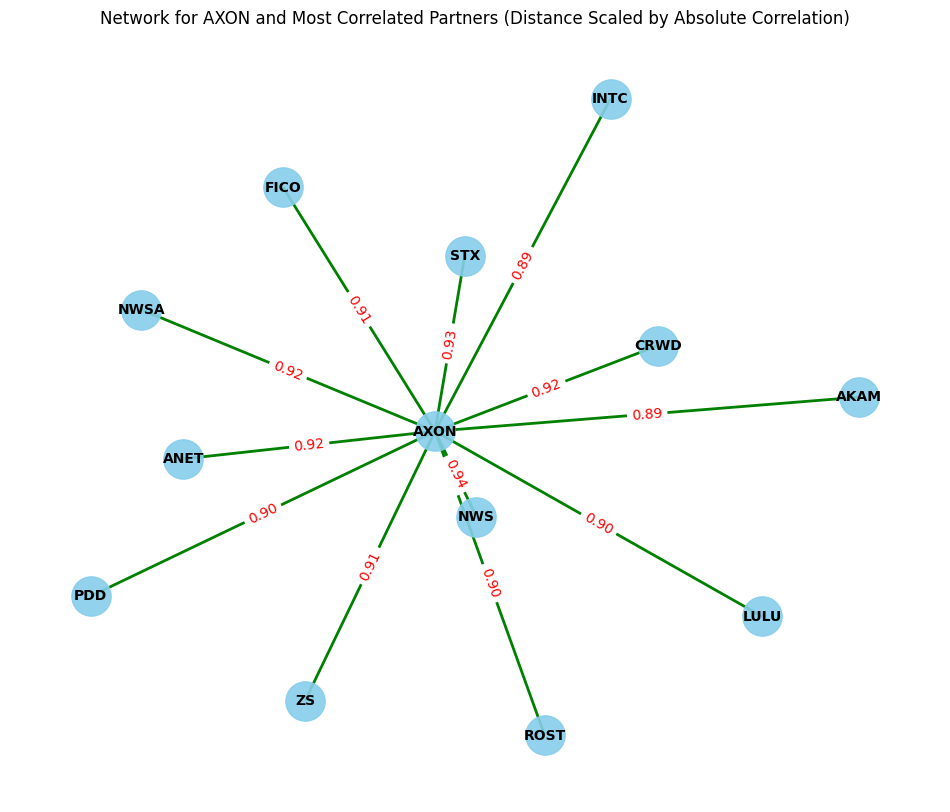

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

def plot_ticker_network_modified(correlated_data, target_ticker):
  """
  Plots a network graph for a specific ticker and its most correlated partners,
  only including connections where the target ticker is in 'ticker_a'.
  The distance between nodes is inversely proportional to the absolute correlation,
  scaled based on the distribution of absolute correlations for the target ticker.

  Args:
    correlated_data: DataFrame with columns 'ticker_a', 'ticker_b', 'correlation_coefficient'.
    target_ticker: The ticker for which to generate the network graph.
  """
  # Filter the data to include only connections where the target ticker is in 'ticker_a'
  ticker_connections = correlated_data[correlated_data['ticker_a'] == target_ticker].copy()

  # Handle cases where there are no connections found after filtering
  if ticker_connections.empty:
      print(f"No significant correlations found for ticker {target_ticker} as 'ticker_a' within the provided data.")
      return

  # Calculate absolute correlations
  ticker_connections['abs_correlation'] = ticker_connections['correlation_coefficient'].abs()

  # --- Scaling for Distance (Inverse Relationship) ---
  # We want larger absolute correlation to mean smaller distance.
  # A simple transformation is 1 / abs_correlation. However, this can lead to
  # infinite distance for zero correlation.
  # A more robust approach is to scale relative to the range of absolute correlations.
  min_abs_corr = ticker_connections['abs_correlation'].min()
  max_abs_corr = ticker_connections['abs_correlation'].max()

  # Avoid division by zero if all correlations are the same
  if max_abs_corr == min_abs_corr:
      # If all correlations are the same, set a fixed weight (distance)
      ticker_connections['distance_weight'] = 1.0
  else:
      # Scale absolute correlations to a range (e.g., 0.1 to 1.0) where 1.0 is the min_abs_corr
      # and 0.1 is the max_abs_corr. Then use the inverse.
      # We map the range [min_abs_corr, max_abs_corr] to [1.0, 0.1] for distance.
      # Linear mapping: distance_weight = m * abs_correlation + c
      # At min_abs_corr, distance_weight = 1.0
      # At max_abs_corr, distance_weight = 0.1
      # Solving for m and c:
      # 1.0 = m * min_abs_corr + c
      # 0.1 = m * max_abs_corr + c
      # Subtracting the second from the first: 0.9 = m * (min_abs_corr - max_abs_corr)
      # m = 0.9 / (min_abs_corr - max_abs_corr)
      # c = 1.0 - m * min_abs_corr

      m = 0.9 / (min_abs_corr - max_abs_corr)
      c = 1.0 - m * min_abs_corr

      ticker_connections['distance_weight'] = m * ticker_connections['abs_correlation'] + c

      # Ensure the distance_weight is within a reasonable range (e.g., 0.1 to 1.0)
      ticker_connections['distance_weight'] = ticker_connections['distance_weight'].clip(lower=0.1, upper=1.0)


  # Create a graph
  # We'll use 'distance_weight' to influence the spring_layout
  G = nx.from_pandas_edgelist(ticker_connections,
                              'ticker_a', 'ticker_b', ['correlation_coefficient', 'abs_correlation', 'distance_weight'])


  # Customize graph visualization
  plt.figure(figsize=(12, 10))
  # Use the calculated 'distance_weight' for spring_layout. Lower weight means stronger pull (closer).
  # Note: spring_layout's 'weight' parameter represents the *strength* of the spring.
  # So, if we want larger correlation to mean smaller distance, we need a weight
  # that is inversely proportional to the desired distance.
  # We can use 1 / distance_weight, but let's test the 'distance_weight' directly first,
  # as spring_layout might interpret higher weights as stronger connections resulting in
  # closer nodes, which is what we want based on our distance_weight calculation.
  # Let's use 1/distance_weight as the weight for spring_layout, as a smaller distance_weight
  # should correspond to a weaker spring force (larger distance).
  # However, spring_layout uses higher weights for stronger springs (closer nodes).
  # Our 'distance_weight' is already designed such that higher absolute correlation
  # results in a smaller distance_weight value. So, for spring_layout, we want
  # a weight that is *inversely* related to distance_weight. Let's try using
  # the inverse of our distance_weight as the spring force weight.

  # Create a weight for spring_layout that is inversely proportional to distance_weight
  # Add a small epsilon to avoid division by zero if distance_weight is ever exactly 0
  for u, v, d in G.edges(data=True):
      d['spring_weight'] = 1.0 / (d['distance_weight'] + 1e-6)

  pos = nx.spring_layout(G, k=0.5, weight='spring_weight', iterations=100) # Use the inverse distance as spring weight


  # Draw nodes
  nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.9)

  # Draw edges and color based on correlation sign
  edge_colors = ['red' if data['correlation_coefficient'] < 0 else 'green' for u, v, data in G.edges(data=True)]
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

  # Draw labels
  nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

  # Draw edge labels (correlation values)
  edge_labels = {(u, v): data['correlation_coefficient'] for u, v, data in G.edges(data=True)}
  formatted_edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='red')

  plt.title(f'Network for {target_ticker} and Most Correlated Partners (Distance Scaled by Absolute Correlation)')
  plt.axis('off') # Hide axes
  plt.show()

# Example usage (assuming most_correlated_stocks_long is your long format DataFrame)
plot_ticker_network_modified(most_correlated_stocks_long, 'AXON') # Replace 'AAPL' with the ticker you want to visualize